<a href="https://colab.research.google.com/github/createnewdemo/pytorch/blob/main/%E7%AE%80%E5%8D%95%E7%9A%84%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#导入库
import  torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas
from torch.utils.data import Dataset

In [7]:
#开始构建神经网络
class Classifier(nn.Module):


  def __init__(self):
    #初始化Pytorch父类
    super().__init__()
    #记录训练进展的计数器和列表

    self.counter = 0
    self.progress = []
    #PyTorch.nn模块会为我们设置分类器

    #定义神经网网络 -----------------------模块加正向的信息传导  还要定义如何计算误差以及用误差更新网络的可学习参数
    self.model = nn.Sequential(
        nn.Linear(784,200),             #是从784个节点到200个节点的全连接映射   这个模块包含节点之间连接的权重  在训练时会被更新
        nn.Sigmoid(),              # 将S型逻辑激活函数应用于前一个模块的输出  也就是本例中200个节点的输出
        nn.Linear(200,10),   #将200个节点映射到10个节点的全连接映射   它包含中间隐藏层与输出层10个节点之间所有连接的权重
        nn.Sigmoid()   # 再将S型逻辑激活函数应用于10个节点的输出  其结果就是网络的最终输出
    )

    #创建损失函数
    self.loss_function = nn.MSELoss()

    #创建优化器，使用简单的梯度下降------随机梯度下降
    # 把所有可学习参数都传递给SGD优化器  这些参数可以通过self.parameters() 访问
    self.optimiser = torch.optim.SGD(self.parameters(),lr=0.01)
    pass

  #PyTorch 假定通过一个forward()方法 向网络传递信息
  def forward(self,inputs):
    #直接运行模型
    return self.model(inputs)

  def train(self,inputs,targets):
    #计算网络的输出值
    outputs = self.forward(inputs)

    #计算损失值
    loss = self.loss_function(outputs,targets)


    


    #每隔10个训练样本增加一次计数器的值   并将损失值添加进列表的末尾
    self.counter += 1

    if (self.counter % 10 == 0):
      self.progress.append(loss.item())  # loss.item()   方便展开一个单值张量  获取里面的数字
      pass
    
    if (self.counter % 10000 == 0):
      print("counter=",self.counter)
      pass
    #梯度归0  反向传播  并更新权重
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    pass

    #损失值绘图
  def plot_progress(self):
    df = pandas.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass




class MnistDataset(Dataset):
  
  def __init__(self,csv_file):

    self.data_df = pandas.read_csv(csv_file,header=None)
    pass
  
  def __len__(self):
    return len(self.data_df)
  
  def __getitem__(self,index):
    #目标图像
    label = self.data_df.iloc[index,0]
    target = torch.zeros((10))
    target[label] = 1.0 #one-hot 编码


    #图像数据  取值是0-255  标准化0-1
    image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0

    # 返回标签

    return label,image_values,target

  def plot_image(self, index):
      arr = self.data_df.iloc[index,1:].values.reshape(28,28)
      plt.title("label = " + str(self.data_df.iloc[index,0]))
      plt.imshow(arr,interpolation='none',cmap='Blues')
      pass

  pass

  








In [3]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [8]:
mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/mnist_data/mnist_train.csv')

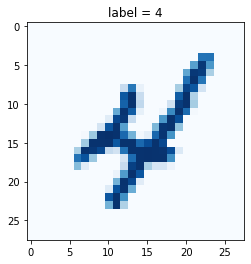

In [5]:
mnist_dataset.plot_image(9)

In [ ]:
mnist_dataset[100]

In [9]:
%%time
#创建神经网络
C = Classifier()
epochs = 3
#在MNIST数据集中训练神经网络
for i in range(epochs):
  print("training epoch",i+1,"of",epochs)
  for label, image_data_tensor,target_tensor in mnist_dataset:
    C.train(image_data_tensor,target_tensor)
    pass
  pass

training epoch 1 of 3
counter= 10000
counter= 20000
counter= 30000
counter= 40000
counter= 50000
counter= 60000
training epoch 2 of 3
counter= 70000
counter= 80000
counter= 90000
counter= 100000
counter= 110000
counter= 120000
training epoch 3 of 3
counter= 130000
counter= 140000
counter= 150000
counter= 160000
counter= 170000
counter= 180000
CPU times: user 3min 11s, sys: 2.16 s, total: 3min 13s
Wall time: 3min 13s


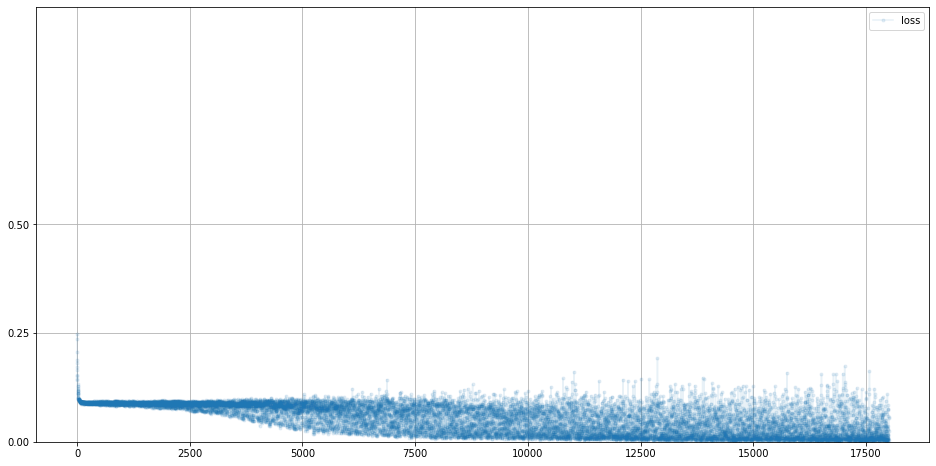

In [10]:
# 绘制分类器损失值
C.plot_progress()

In [24]:
!/opt/bin/nvidia-smi

Mon Dec  6 13:45:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    32W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/mnist_data/mnist_test.csv')

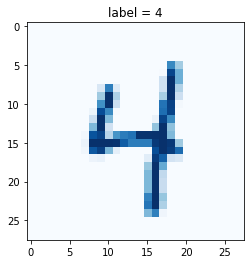

In [12]:
#挑选一副图像
record = 19

#绘制图像和标签
mnist_test_dataset.plot_image(record)

In [13]:
image_data = mnist_test_dataset[record][1]

In [14]:
type(mnist_test_dataset)

__main__.MnistDataset

In [15]:
#调用训练后的神经网络
out_put = C.forward(image_data)

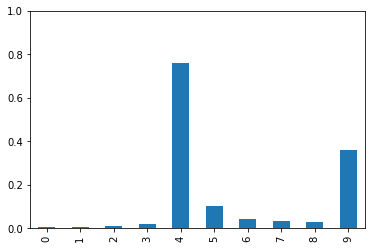

In [16]:
#绘制输出张量 输出被转换成一个简单的numpy数组再被包装成一个DataFrame以便绘制柱形图
pandas.DataFrame(out_put.detach().numpy()).plot(kind='bar',legend=False,ylim=(0,1))

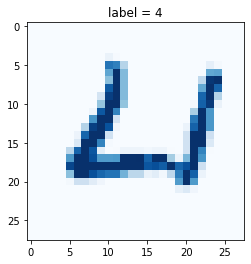

In [17]:
#挑选一副图像
record = 33

#绘制图像和标签
mnist_test_dataset.plot_image(record)

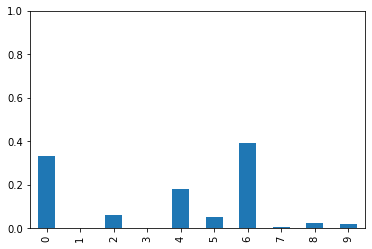

In [18]:
image_data1 = mnist_test_dataset[record][1]
output = C.forward(image_data1)

pandas.DataFrame(output.detach().numpy()).plot(kind='bar',legend=False,ylim=(0,1))

In [20]:
# 测试用训练数据训练后的网络
score = 0
items = 0

for label, image_data_tensor , target_tensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  if (answer.argmax() == label): #answer.argmax()  输出张量answer中最大值的索引 
    score  += 1
    pass
  items +=1
  pass
print(score,items,score/items)

8669 10000 0.8669
